In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [3]:
df = pd.read_csv('boston_marathon_2013.csv')
df = df.drop_duplicates()

df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
#examining the columns of df
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [5]:
#initial exploration of df using describe method
df.describe()

,age,division,official,overall,pace,genderdiv
count,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000,16157.000000
mean,41.643374,1101.441852,208.192250,8433.023272,7.948645,4353.567927
std,10.350718,942.042590,23.696453,5050.073585,0.903952,2771.521698
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,364.000000,191.750000,4067.000000,7.320000,2036.000000
50%,42.000000,843.000000,209.230000,8251.000000,7.980000,4115.000000
75%,49.000000,1560.000000,225.230000,12664.000000,8.600000,6317.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


In [6]:
#examining column types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 0 to 16163
Data columns (total 21 columns):
25k          16157 non-null object
age          16157 non-null int64
name         16157 non-null object
division     16157 non-null int64
10k          16157 non-null object
gender       16157 non-null object
half         16157 non-null object
official     16157 non-null float64
bib          16157 non-null object
ctz          757 non-null object
country      16157 non-null object
overall      16157 non-null int64
pace         16157 non-null float64
state        14701 non-null object
30k          16157 non-null object
5k           16157 non-null object
genderdiv    16157 non-null int64
20k          16157 non-null object
35k          16157 non-null object
city         16156 non-null object
40k          16157 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.7+ MB


In [7]:
#exploring the gender column
df.gender.value_counts()

M    9673
F    6484
Name: gender, dtype: int64

In [8]:
#examining the dtype for the "gender" column.
print(df['gender'].dtype)

object


In [9]:
#encoding the gender column to numerical values using map()
df['gender'] = df["gender"].map({'M':1, "F":0})

In [10]:
print(df['gender'].dtype)

int64


In [11]:
#dropping unnecessary columns
X = df.drop(['name', 'ctz', 'country', 'state', 'city', 'bib'], 1)

#y = df['overall']

In [12]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16157 entries, 0 to 16163
Data columns (total 15 columns):
25k          16157 non-null object
age          16157 non-null int64
division     16157 non-null int64
10k          16157 non-null object
gender       16157 non-null int64
half         16157 non-null object
official     16157 non-null float64
overall      16157 non-null int64
pace         16157 non-null float64
30k          16157 non-null object
5k           16157 non-null object
genderdiv    16157 non-null int64
20k          16157 non-null object
35k          16157 non-null object
40k          16157 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 2.0+ MB


In [14]:
#converting the string columns into numeric and filling the nans using ffill.
X['25k'] = pd.to_numeric(X['25k'], errors='coerce')
X['25k'].ffill(axis=0, inplace=True)

X['10k'] = pd.to_numeric(X['10k'], errors='coerce')
X['10k'].ffill(axis=0, inplace=True)

X['half'] = pd.to_numeric(X['half'], errors='coerce')
X['half'].ffill(axis=0, inplace=True)

X['30k'] = pd.to_numeric(X['30k'], errors='coerce')
X['30k'].ffill(axis=0, inplace=True)

X['5k'] = pd.to_numeric(X['5k'], errors='coerce')
X['5k'].ffill(axis=0, inplace=True)

X['20k'] = pd.to_numeric(X['20k'], errors='coerce')
X['20k'].ffill(axis=0, inplace=True)

X['35k'] = pd.to_numeric(X['35k'], errors='coerce')
X['35k'].ffill(axis=0, inplace=True)

X['40k'] = pd.to_numeric(X['40k'], errors='coerce')
X['40k'].ffill(axis=0, inplace=True)





In [15]:
X.isnull().sum().sum()

0

In [16]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)


### Kmeans

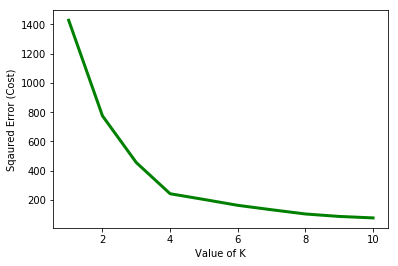

In [17]:
#using the elbow method to get the optimum value for K
cost =[] 
for i in range(1, 11): 
    KM_test = KMeans(n_clusters = i, max_iter = 500) 
    KM_test.fit(X_norm) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM_test.inertia_)    
    
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

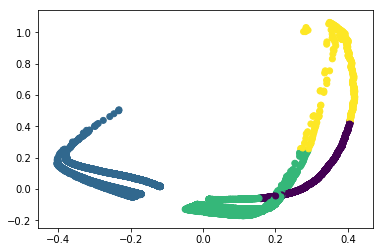

In [18]:
#initializing Kmeans and predicting cluster value for each data point
km = KMeans(n_clusters=4, init='k-means++')
km.fit(X_norm)

labels_pred_km = km.predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred_km)
plt.show()


In [19]:
#extracting the cluster labels from kmeans and assigning it to variable cluster_labels_km
cluster_labels_km = km.labels_

In [20]:
#extracting the cluster centers from kmeans
km.cluster_centers_

array([[4.00605476e-02, 1.24180784e-02, 4.14887321e-01, 1.59525111e-02,
        3.97668927e-04, 3.37324795e-02, 6.96584943e-02, 6.57232900e-01,
        2.65998205e-03, 4.84222760e-02, 8.00609102e-03, 6.00452937e-01,
        3.19857936e-02, 5.70384511e-02, 6.57994683e-02],
       [1.35532804e-02, 4.10882162e-03, 1.02684908e-01, 5.37521979e-03,
        2.22261445e-18, 1.13901972e-02, 2.35726859e-02, 9.51282229e-01,
        8.99993323e-04, 1.64230489e-02, 2.69885017e-03, 2.60740336e-01,
        1.07977243e-02, 1.93738752e-02, 2.22977291e-02],
       [1.64266579e-02, 7.01427298e-03, 7.84887569e-02, 6.51554707e-03,
        1.48085525e-04, 1.38103427e-02, 2.87900645e-02, 7.82774704e-01,
        1.09924763e-03, 1.99143891e-02, 3.26794213e-03, 6.06334339e-01,
        1.30915145e-02, 2.35281124e-02, 2.71791325e-02],
       [2.32588951e-01, 9.16856998e-02, 2.06931607e-01, 9.16749077e-02,
        2.73786082e-03, 1.95632581e-01, 4.04512331e-01, 3.35802163e-01,
        1.54489502e-02, 2.81925557e-0

In [21]:
#extracting kmeans inertia value
km.inertia_

242.7114464445643

### Spectral Clustering

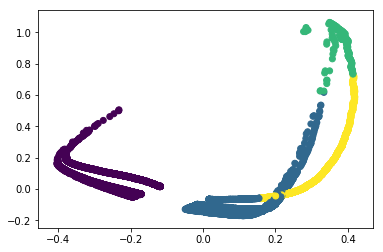

In [22]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_norm)

#Predicted clusters.
sc_labels = sc.fit_predict(X_norm)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sc_labels)
plt.show()

#print('Comparing the assigned categories to the ones in the data:')
#print(pd.crosstab(y_train,predict))

### Mean shift

In [23]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

MS_predict_labels = ms.fit_predict(X_norm)

# Extract cluster assignments for each data point and assign it to variable ms_labels
ms_labels = ms.labels_

# Count our clusters.
n_clusters_ms = len(np.unique(ms_labels))

print("Number of estimated clusters: {}".format(n_clusters_ms))

Number of estimated clusters: 4


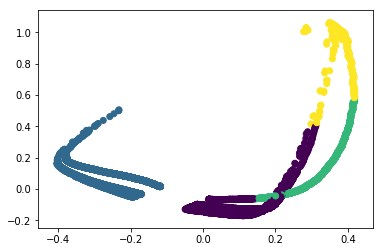

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=MS_predict_labels)
plt.show()

In [25]:
# Extract cluster assignments from mean shift for each data point and assign it to variable ms_labels
ms_labels = ms.labels_


In [26]:
# Coordinates of the cluster centers for mean shift
cluster_centers_ms = ms.cluster_centers_

In [27]:
#creating a new column for dataframe X, containing cluster labels for each observation (datapoint) from Kmeans results.
X['ClusterNum'] = labels_pred_km

In [28]:
X.head()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,ClusterNum
0,49.87,28,9,18.18,1,40.93,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55,3
1,77.27,30,5,30.90,1,64.90,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77,3
2,77.23,23,1,30.90,1,64.92,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78,3
3,50.50,32,5,18.73,1,42.00,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43,3
4,48.75,39,3,18.18,1,40.57,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88,3


This Boston Marathon dataset for year 2013 contains alot of columns tracking the performace of each runner.  It has a categorical column "gender", which I encoded to numeric with 0 representing females and 1 representing males.  There is also a column with the age of each runner.  The remaining columns, such as "20k" and "25k", track the minute mark for each runner at the different distance intervals of the race.

I used the results from Kmeans to create a new column called "ClusterNum", which represents the cluster label for each observation in the data.  

In [29]:
#examining ClusterName column
X.ClusterNum.value_counts()

2    6613
1    6475
0    2707
3     362
Name: ClusterNum, dtype: int64

For the data, Kmeans created four clusters.  From the above results using value_counts, we can see that the majority of points are in cluster 0, cluster 1, and cluster 3, with a handful of the remaining points in cluster 2.

In [30]:
#using pd.crosstab to compare gender with cluster assignment
print('Comparing clusters against gender:')
print(pd.crosstab(X['ClusterNum'], X['gender']))

Comparing clusters against gender:
gender         0     1
ClusterNum            
0              0  2707
1           6475     0
2              0  6613
3              9   353


By exploring the gender column by comparing it to each datapoints cluster assignment using cross tab, the results show that almost all of the female runners were assigned to cluster 1, while all the males were assigned to the three remaining clusters.  This may suggest that significant differences exist between males and females regarding performance in the race. 

In [31]:
#subsetting the data for males and females into separate dataframes
#df_male = X[X['gender'] == 1]
#df_female = X[X['gender'] == 0]

In [34]:
#getting the average of all numeric variables by grouping the data by gender
X.groupby('gender').mean()

,25k,age,division,10k,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,ClusterNum
gender,,,,,,,,,,,,,,,
0,125.539806,38.506323,1207.588988,49.609570,105.361565,219.633004,10967.729642,8.385028,152.422751,24.873745,3399.124923,99.864452,180.190416,207.689898,1.002776
1,113.312212,43.746201,1030.289362,44.813689,95.145267,200.523290,6733.960302,7.656128,137.683094,22.455891,4993.349633,90.178865,163.164226,189.143254,1.476791


After grouping the data using the gender column, we can clearly see the differences.  For example, females on average took longer to cross every distance interval recorded for the marathon.  The bar graph below shows that the average official time for females greater than it is for males.

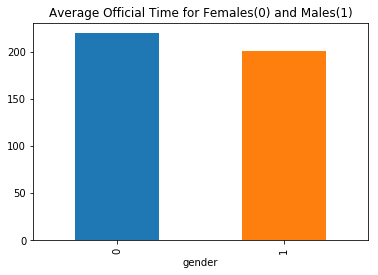

In [38]:
X['official'].groupby(X['gender']).aggregate(np.average).plot(kind='bar', title="Average Official Time for Females(0) and Males(1)")

After grouping the data using the gender column, we can clearly see the differences.  For example, females on average took longer to cross every distance interval recorded for the marathon.  The bar graph above shows that the average official time for females greater than it is for males.

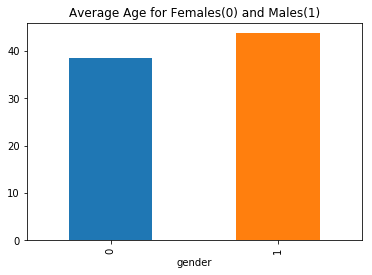

In [39]:
X['age'].groupby(X['gender']).aggregate(np.average).plot(kind='bar', title="Average Age for Females(0) and Males(1)")

Another interesting fact is that although females took longer to complete the race, they were on average five years younger.  Next I'm going to explore the age column by subsetting according to the cluster label for each observation.

In [32]:
dfX_cluster0 = X[X['ClusterNum'] == 0]
dfX_cluster1 = X[X['ClusterNum'] == 1]
dfX_cluster2 = X[X['ClusterNum'] == 2]
dfX_cluster3 = X[X['ClusterNum'] == 3]

Text(0.5, 0, 'Age')

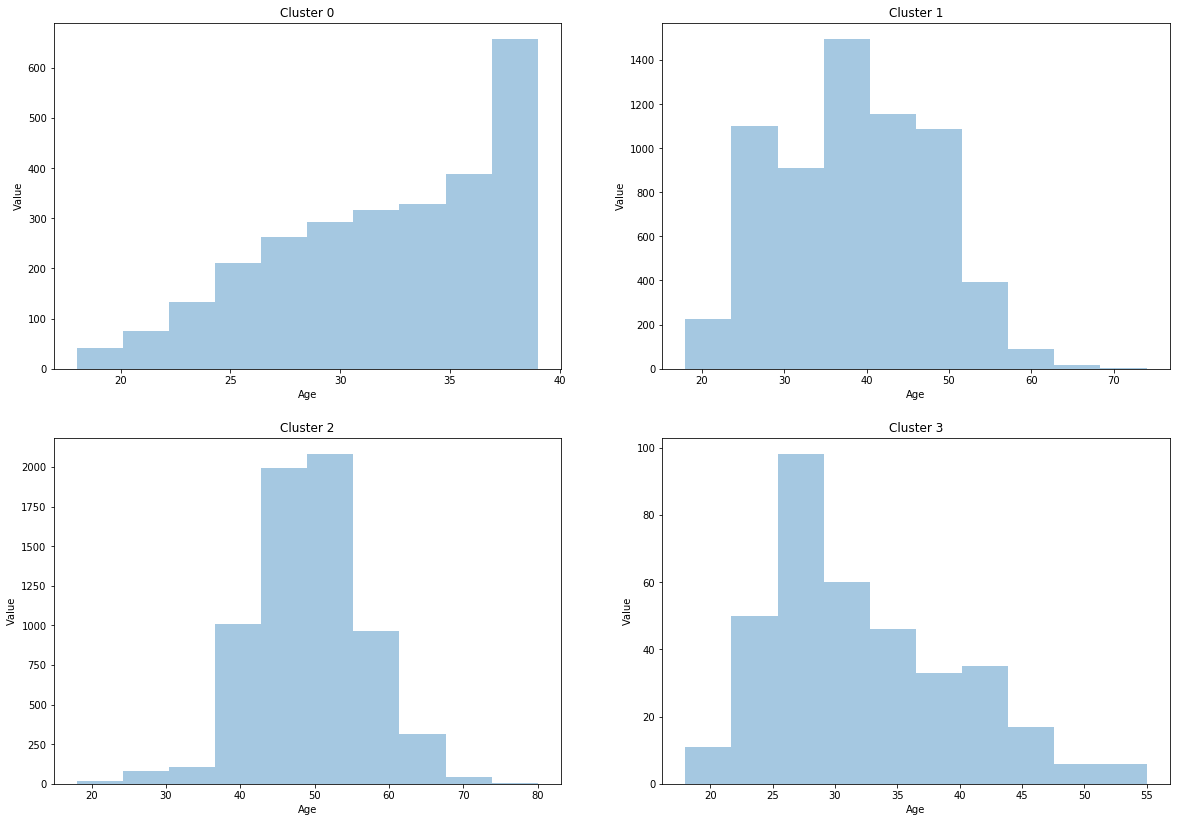

In [33]:
#setting figure size
f = plt.figure(figsize=(20,14))

#making a plot figure that will have two rows with two plots in each row
f.add_subplot(2, 2, 1)
sns.distplot(dfX_cluster0['age'], bins=10, kde=False)
plt.title("Cluster 0")
plt.ylabel('Value')
plt.xlabel('Age')

f.add_subplot(2, 2, 2)
sns.distplot(dfX_cluster1['age'], bins=10, kde=False)
plt.title('Cluster 1')
plt.ylabel('Value')
plt.xlabel('Age')


f.add_subplot(2, 2, 3)
sns.distplot(dfX_cluster2['age'], bins=10, kde=False)
plt.title("Cluster 2")
plt.ylabel('Value')
plt.xlabel('Age')

f.add_subplot(2, 2, 4)
sns.distplot(dfX_cluster3['age'], bins=10, kde=False)
plt.title('Cluster 3')
plt.ylabel('Value')
plt.xlabel('Age')

The above histograms show the distribution of the different age groups that are prevalent in each of the clusters.  Cluster 1 and cluster 2 include the majority of runners and they tend to be older than the runners grouped in clusters 0 and 3, but cluster 1 has a larger spread of ages than cluster 2. 

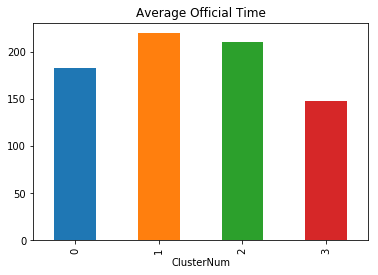

In [45]:
#bar graph of official timing grouped by "ClusterNum"
X['official'].groupby(X['ClusterNum']).aggregate(np.average).plot(kind='bar', title="Average Official Time")

After looking the the two sets of bar graphs above, it seems that Kmeans is grouping the data into different clusters based on the differences in age and official times recorded for the different runners represented by the dataset.

In [52]:
#bar graph of 10k distance interval grouped by "ClusterNum"
#X['10k'].groupby(X['ClusterNum']).aggregate(np.average).plot(kind='bar', title="Average Official Time")

In [51]:
#X['20k'].groupby(X['ClusterNum']).aggregate(np.average).plot(kind='bar', title="Average Official Time")

In [50]:
#X['25k'].groupby(X['ClusterNum']).aggregate(np.average).plot(kind='bar', title="Average Official Time")